In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv(r'D:\Python_rnw\one\mathematics\PR4\spread_locator_dataset_update.csv')

In [4]:
df.describe()

,transaction_amount,transaction_count
count,220.000000,220.000000
mean,3365.192409,2.854545
std,1985.705409,1.797189
min,804.420000,0.000000
25%,2124.205000,1.750000
50%,3077.715000,3.000000
75%,3950.737500,4.000000
max,20462.840000,9.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      220 non-null    object 
 1   customer_id         220 non-null    object 
 2   transaction_amount  220 non-null    float64
 3   transaction_date    220 non-null    object 
 4   transaction_count   220 non-null    int64  
 5   region              220 non-null    object 
 6   transaction_status  220 non-null    object 
 7   success             220 non-null    int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 13.9+ KB


In [23]:
df.head()

,transaction_id,customer_id,transaction_amount,transaction_date,transaction_count,region,transaction_status,success
0,e98aa092-3770-4fdb-9502-5b5a6a244811,CUST2824,3821.34,26-01-2023,3,North,Fail,0
1,11ba6918-dba0-41e5-96cf-f5a7b95f0103,CUST1409,2781.84,28-01-2023,0,East,Fail,0
2,82b7654b-6eb7-4579-89a0-1a9edec0a7bb,CUST5506,4120.97,28-01-2023,0,South,Fail,0
3,f7166574-f400-4d53-b526-0b11f6619ddf,CUST5012,6383.78,18-01-2023,2,South,Success,1
4,8632fe26-b507-4068-9c68-1b2fa04fecb3,CUST4657,2651.61,04-01-2023,4,North,Success,1


In [10]:
amount = df['transaction_amount']
daily_count = df['transaction_count']

Bernoulli & Binomial Distribution

In [9]:
# Bernoulli: transaction success (1 = Success, 0 = Fail)
df['success'] = df['transaction_status'].apply(lambda x: 1 if x=='Success' else 0)

p = df['success'].mean()  
print("Probabilty of success:",p)


Probabilty of success: 0.44545454545454544


In [25]:
# Binomial: weekly transactions (n=7)
binom_distribution = stats.binom(n=7, p=p)
binom_distribution.mean()

np.float64(3.118181818181818)

Poisson Distribution

In [13]:
lambda_poisson = daily_count.mean()
print("Using Poisson Distribution:",lambda_poisson)

Using Poisson Distribution: 2.8545454545454545


In [14]:
# Probability of k transactions
stats.poisson.pmf(2, lambda_poisson)

np.float64(0.23460139537891772)

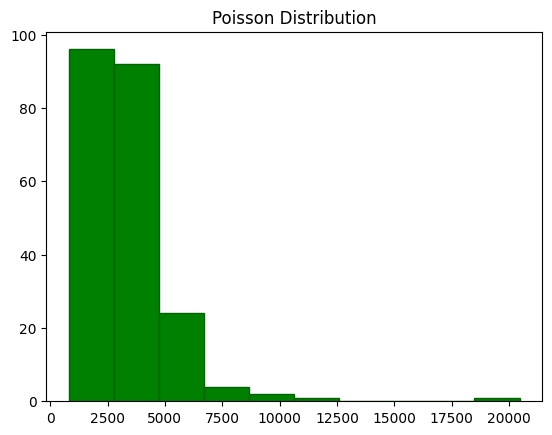

In [28]:
plt.hist(amount, bins=10, color='green', edgecolor='darkgreen')
plt.title("Poisson Distribution")
plt.show()


Log-Normal & Power Law Modeling

In [16]:
# Log-Normal fit
shape, loc, scale = stats.lognorm.fit(amount, floc=0)
print("LogNormal params:", shape, loc, scale)

power_params = stats.powerlaw.fit(amount)
print("PowerLaw params:", power_params)


LogNormal params: 0.4749178350151927 0 2983.1591334067753
PowerLaw params: (np.float64(0.41232325172331613), np.float64(804.4199999999998), np.float64(19658.420000000006))


Q-Q Plot

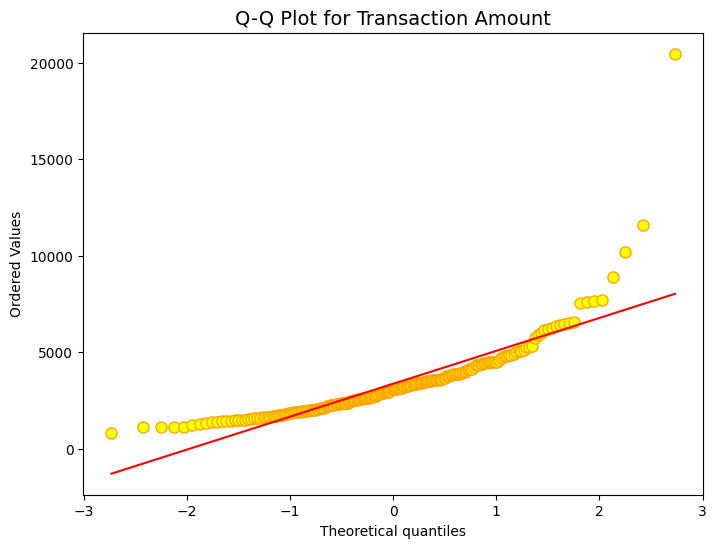

In [33]:
fig, ax = plt.subplots(figsize=(8,6))

stats.probplot(amount, dist="norm", plot=ax)

ax.get_lines()[0].set_markerfacecolor('yellow')
ax.get_lines()[0].set_markeredgecolor('orange')
ax.get_lines()[0].set_markersize(8)

ax.set_title("Q-Q Plot for Transaction Amount", fontsize=14)

plt.show()

Box-Cox Transformation

In [34]:
amounts_positive = amount + 1  
transformed_data, lambda_bc = stats.boxcox(amounts_positive)

print("Box-Cox Lambda:", lambda_bc)

Box-Cox Lambda: -0.18123614601505497


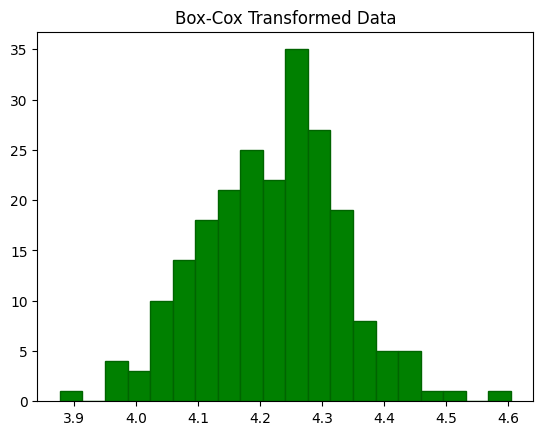

In [38]:
plt.hist(transformed_data, bins=20, color = 'green', edgecolor= 'darkgreen')
plt.title("Box-Cox Transformed Data")
plt.show()

Z-Score & Probability > ₹5000

In [ ]:
z_scores = stats.zscore(amount)

#Probability transaction > 5000
prob_gt_5000 = 1 - stats.norm.cdf(5000, amount.mean(), amount.std())
print("Probability is:",prob_gt_5000)

Probability is: 0.20517209567554384


PDF & CDF Plot

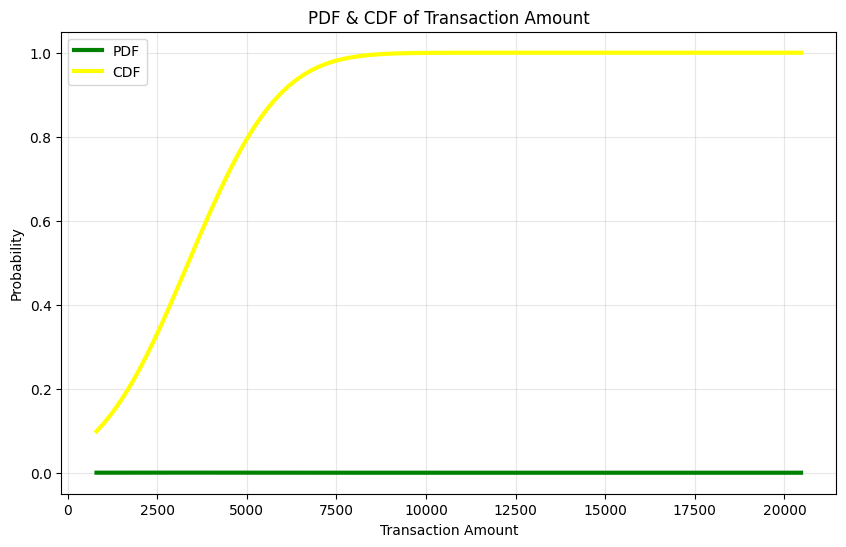

In [50]:
x = np.linspace(amount.min(), amount.max(), 100)

pdf = stats.norm.pdf(x, amount.mean(), amount.std())
cdf = stats.norm.cdf(x, amount.mean(), amount.std())

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, pdf, color='green', linewidth=3, label='PDF')
ax.plot(x, cdf, color='yellow', linewidth=3, label='CDF')

ax.legend()  # Only shows plotted lines!

ax.set_title("PDF & CDF of Transaction Amount")
ax.set_xlabel("Transaction Amount")
ax.set_ylabel("Probability")

ax.grid(True, alpha=0.3)
plt.show()


### Conclusion:
- Transaction amounts are **right-skewed**
- Log-Normal distribution fits better than Normal
- Poisson works well for transaction counts
- High-value transactions (>₹5000) have low probability
- Useful for fraud detection & risk analysis
